In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('historico.xlsx')

print(df.columns)


Index(['Matrícula', 'Disciplina', ' Média', ' Semestre', ' Ano'], dtype='object')


In [ ]:

# Verifica as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Verifica as últimas linhas do DataFrame
print("\nÚltimas linhas do DataFrame:")
print(df.tail())

# Verifica informações sobre os dados
print("\nInformações sobre os dados:")
print(df.info())

# Preenche os valores ausentes na coluna 'Média' com a média ponderada das notas do aluno na disciplina
df[' Média'] = df.groupby(['Matrícula', 'Disciplina'])[' Média'].transform(lambda x: x.fillna(x.mean()))


Primeiras linhas do DataFrame:
   Matrícula  Disciplina   Média   Semestre   Ano
0    5495311       41082     0.3          1  2015
1    5495311       41282     2.8          1  2015
2    5495311       91982     6.9          1  2015
3    5495311       11582     5.5          1  2015
4    5495311       51782     5.0          1  2015

Últimas linhas do DataFrame:
       Matrícula  Disciplina   Média   Semestre   Ano
30651    5499368       93943     6.3          1  2021
30652    5499368       13383     5.6          1  2021
30653    5499368       13583     0.7          1  2021
30654    5499368       33022     6.5          1  2021
30655    5499368       53321     5.9          1  2021

Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30656 entries, 0 to 30655
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Matrícula   30656 non-null  int64  
 1   Disciplina  30656 non-null  int64  
 2    Média   

In [ ]:
df


,Matrícula,Disciplina,Média,Semestre,Ano
0,5495311,41082,0.3,1,2015
1,5495311,41282,2.8,1,2015
2,5495311,91982,6.9,1,2015
3,5495311,11582,5.5,1,2015
4,5495311,51782,5.0,1,2015
...,...,...,...,...,...
30651,5499368,93943,6.3,1,2021
30652,5499368,13383,5.6,1,2021
30653,5499368,13583,0.7,1,2021
30654,5499368,33022,6.5,1,2021


In [ ]:

def calcular_taxa_reprovacao(df):
    # Agrupa os dados por matrícula e disciplina, contando o número de reprovações
    reprovacoes = df[df[' Média'] < 5].groupby(['Matrícula', 'Disciplina']).size().reset_index(name='Reprovações')

    # Conta o número de alunos únicos
    total_alunos = df['Matrícula'].nunique()

    # Calcula a taxa de reprovação para cada número de reprovações
    taxa_reprovacao = reprovacoes.groupby('Reprovações').size() / total_alunos * 100

    return taxa_reprovacao


In [ ]:
# Calcula a taxa de reprovação
taxa_reprovacao = calcular_taxa_reprovacao(df)

# Cria um DataFrame com os resultados
tabela_resultados = pd.DataFrame({'Nº Reprovações': taxa_reprovacao.index,
                                  'Taxa Reprovação': taxa_reprovacao.values.round(2)})

print("Taxa de Reprovação por Número de Reprovações:")
display(tabela_resultados)


Taxa de Reprovação por Número de Reprovações:


,Nº Reprovações,Taxa Reprovação
0,1,257.70
1,2,69.19
2,3,26.81
3,4,8.66
4,5,4.16
5,6,1.58
6,7,0.25
7,8,0.50


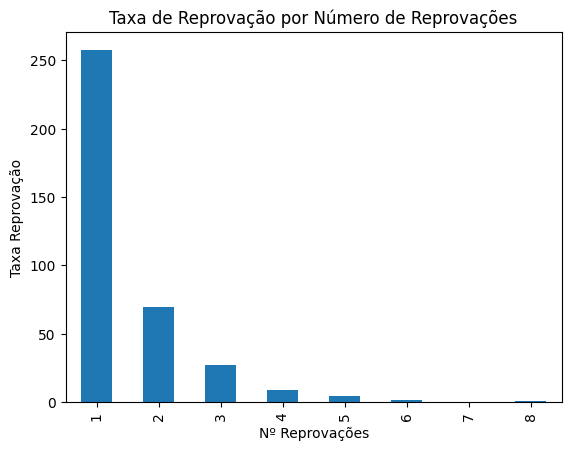

In [ ]:

# Cria o gráfico de barras
taxa_reprovacao.plot(kind='bar')
plt.xlabel('Nº Reprovações')
plt.ylabel('Taxa Reprovação')
plt.title('Taxa de Reprovação por Número de Reprovações')
plt.xticks(range(len(taxa_reprovacao.index)), taxa_reprovacao.index)
plt.show()

In [ ]:
# Cria uma cópia do DataFrame original com as colunas
df_disciplinas = df[['Disciplina', ' Média']].copy()

df_disciplinas

,Disciplina,Média
0,41082,0.3
1,41282,2.8
2,91982,6.9
3,11582,5.5
4,51782,5.0
...,...,...
30651,93943,6.3
30652,13383,5.6
30653,13583,0.7
30654,33022,6.5


In [ ]:
# Calcula a taxa de reprovação por disciplina
reprovacoes_por_disciplina = df_disciplinas[df_disciplinas[' Média'] < 5].groupby('Disciplina').size()
total_alunos_por_disciplina = df_disciplinas.groupby('Disciplina')[' Média'].count()
taxa_reprovacao_por_disciplina = reprovacoes_por_disciplina / total_alunos_por_disciplina * 100

# Cria um novo DataFrame com os resultados por disciplina
tabela_disciplinas = pd.DataFrame({'Disciplina': taxa_reprovacao_por_disciplina.index,
                                   'Taxa de Reprovação (%)': taxa_reprovacao_por_disciplina.values})


In [ ]:
# Identifica a disciplina com maior e menor taxa de reprovação
mais_reprovacoes = tabela_disciplinas.loc[tabela_disciplinas['Taxa de Reprovação (%)'].idxmax(), 'Disciplina']
menos_reprovacoes = tabela_disciplinas.loc[tabela_disciplinas['Taxa de Reprovação (%)'].idxmin(), 'Disciplina']

print("\nTaxa de Reprovação por Disciplina:")
print(tabela_disciplinas.head().to_string(index=False))
print(f"\nDisciplina com mais reprovações: {mais_reprovacoes}")
print(f"Disciplina com menos reprovações: {menos_reprovacoes}")



Taxa de Reprovação por Disciplina:
 Disciplina  Taxa de Reprovação (%)
      11582               42.007435
      13383               10.899183
      13583               18.414322
      14422                8.536585
      14482               21.230769

Disciplina com mais reprovações: 97421
Disciplina com menos reprovações: 56481


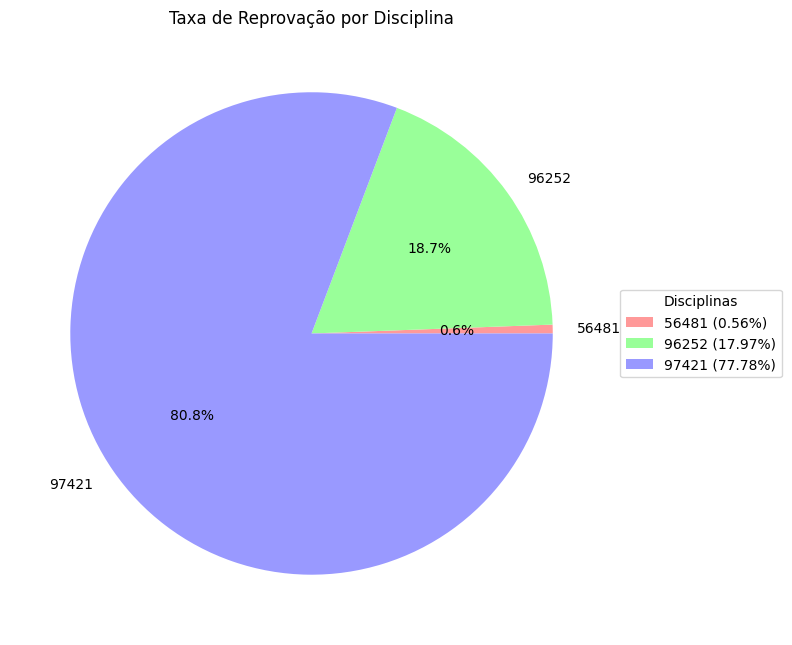

In [ ]:

taxa_media_reprovacao = tabela_disciplinas['Taxa de Reprovação (%)'].mean()
media_reprovacoes = tabela_disciplinas.loc[tabela_disciplinas['Taxa de Reprovação (%)'].sub(taxa_media_reprovacao).abs().idxmin(), 'Disciplina']

# Filtra o DataFrame para mostrar apenas as disciplinas desejadas
disciplinas_selecionadas = [mais_reprovacoes, menos_reprovacoes, media_reprovacoes]
tabela_disciplinas_filtrada = tabela_disciplinas[tabela_disciplinas['Disciplina'].isin(disciplinas_selecionadas)]

# Cria o gráfico de pizza com as disciplinas selecionadas
plt.figure(figsize=(8, 8))
cores = ['#ff9999', '#99ff99', '#9999ff']  # Cores para cada disciplina
wedges, texts, autotexts = plt.pie(tabela_disciplinas_filtrada['Taxa de Reprovação (%)'], labels=tabela_disciplinas_filtrada['Disciplina'], autopct='%1.1f%%', colors=cores)
plt.title('Taxa de Reprovação por Disciplina')

legendas = [f"{disciplina} ({taxa:.2f}%)" for disciplina, taxa in zip(tabela_disciplinas_filtrada['Disciplina'], tabela_disciplinas_filtrada['Taxa de Reprovação (%)'])]
plt.legend(wedges, legendas, title="Disciplinas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


Relação entre a nota obtida na reprovação e o sucesso/fracasso da próxima vez:


,Matrícula,Disciplina,Média,Próxima Nota,Resultado
0,5495311,41082,0.3,7.3,Sucesso
1,5495311,41282,2.8,5.3,Sucesso
10,5495311,32082,2.0,3.1,Fracasso
15,5495311,32082,3.1,2.3,Fracasso
16,5495311,52381,4.7,5.7,Sucesso
...,...,...,...,...,...
30639,5499368,91983,0.6,5.6,Sucesso
30640,5499368,92993,2.4,4.2,Fracasso
30641,5499368,32082,3.6,6.1,Sucesso
30643,5499368,41082,2.7,1.7,Fracasso


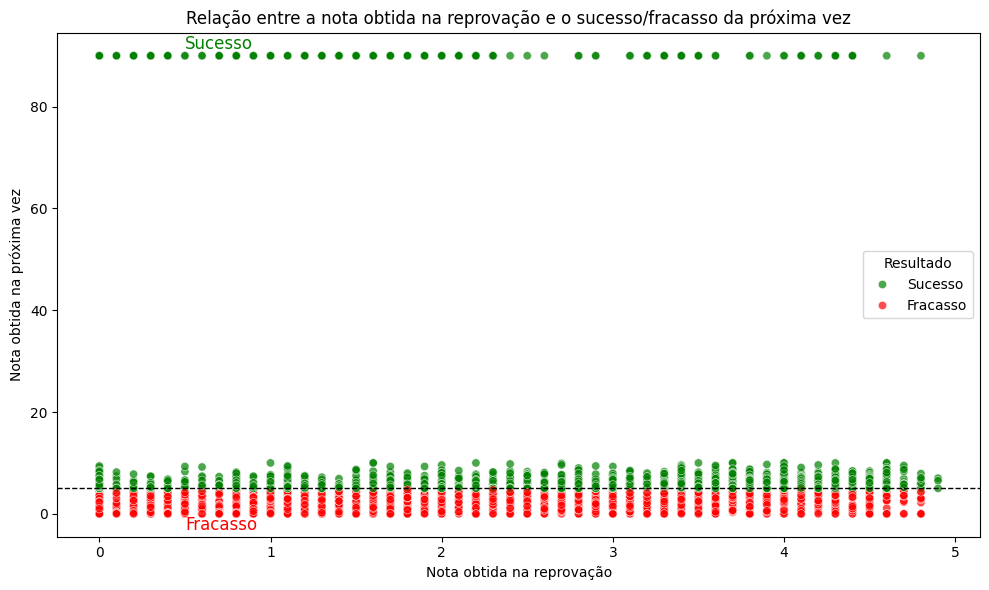

In [ ]:
import seaborn as sns

# Cria um DataFrame com as informações de reprovação e a próxima nota na mesma disciplina
df_reprovacoes = df[df[' Média'] < 5].copy()
df_reprovacoes['Próxima Nota'] = df.groupby(['Matrícula', 'Disciplina'])[' Média'].shift(-1)
df_reprovacoes['Resultado'] = df_reprovacoes['Próxima Nota'].apply(lambda x: 'Sucesso' if x >= 5 else 'Fracasso')

# Remove as linhas com valores ausentes na coluna 'Próxima Nota'
df_reprovacoes.dropna(subset=['Próxima Nota'], inplace=True)

# Imprime o DataFrame com as informações de reprovação e o resultado da próxima vez
print("\nRelação entre a nota obtida na reprovação e o sucesso/fracasso da próxima vez:")
display(df_reprovacoes[['Matrícula', 'Disciplina', ' Média', 'Próxima Nota', 'Resultado']])

# Cria um gráfico de dispersão usando o Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_reprovacoes, x=' Média', y='Próxima Nota', hue='Resultado', palette=['green', 'red'], alpha=0.7)
plt.xlabel('Nota obtida na reprovação')
plt.ylabel('Nota obtida na próxima vez')
plt.title('Relação entre a nota obtida na reprovação e o sucesso/fracasso da próxima vez')

# Adiciona uma linha horizontal tracejada para indicar a média de aprovação (5.0)
plt.axhline(y=5, color='black', linestyle='--', linewidth=1)

plt.text(0.5, df_reprovacoes['Próxima Nota'].min() - 0.5, 'Fracasso', fontsize=12, ha='left', va='top', color='red')
plt.text(0.5, df_reprovacoes['Próxima Nota'].max() + 0.5, 'Sucesso', fontsize=12, ha='left', va='bottom', color='green')

plt.tight_layout()
plt.show()

## Com base nos gráficos e tabelas representados, posso chegar a conclusão que  o menor índice de reprovados foi em 2021 e o maior índice de aprovados foi em 2019 assim como muitas outras informações expressas nos gráficos e tabelas.

In [ ]:
import plotly.graph_objects as go


# Renomeia as colunas removendo espaços extras
df.columns = df.columns.str.strip()

# Converte as colunas 'Disciplina', 'Semestre' e 'Ano' para o tipo inteiro
df['Disciplina'] = df['Disciplina'].astype(int)
df['Semestre'] = df['Semestre'].astype(int)
df['Ano'] = df['Ano'].astype(int)

# Cria uma coluna 'Resultado' indicando se o aluno foi aprovado ou reprovado
df['Resultado'] = df['Média'].apply(lambda x: 'Aprovado' if x >= 5 else 'Reprovado')

# Cria o gráfico de barras com o Plotly
fig = go.Figure()

# Adiciona as barras para cada ano e status
for ano in df['Ano'].unique():
    df_ano = df[df['Ano'] == ano]
    aprovados = df_ano[df_ano['Resultado'] == 'Aprovado'].shape[0]
    reprovados = df_ano[df_ano['Resultado'] == 'Reprovado'].shape[0]

    fig.add_trace(go.Bar(x=['Aprovados'], y=[aprovados], name=f'Aprovados - {ano}', visible=False))
    fig.add_trace(go.Bar(x=['Reprovados'], y=[reprovados], name=f'Reprovados - {ano}', visible=False))

# Adiciona as barras para a somatória de todos os anos
aprovados_total = df[df['Resultado'] == 'Aprovado'].shape[0]
reprovados_total = df[df['Resultado'] == 'Reprovado'].shape[0]

fig.add_trace(go.Bar(x=['Aprovados'], y=[aprovados_total], name='Aprovados - Todos os Anos', visible=True))
fig.add_trace(go.Bar(x=['Reprovados'], y=[reprovados_total], name='Reprovados - Todos os Anos', visible=True))

# Cria os botões de seleção de ano e status
ano_buttons = [dict(label='Todos os Anos', method='update', args=[{'visible': [True, True] + [False] * (len(df['Ano'].unique()) * 2)}])]
for i, ano in enumerate(df['Ano'].unique()):
    ano_buttons.append(dict(label=str(ano), method='update', args=[{'visible': [False, False] + [True if j == i*2 or j == i*2+1 else False for j in range(len(df['Ano'].unique()) * 2)]}]))

status_buttons = [
    dict(label='Ambos', method='update', args=[{'visible': [True, True] * (len(df['Ano'].unique()) + 1)}]),
    dict(label='Aprovados', method='update', args=[{'visible': [True if i % 2 == 0 else False for i in range(len(fig.data))]}]),
    dict(label='Reprovados', method='update', args=[{'visible': [False if i % 2 == 0 else True for i in range(len(fig.data))]}])
]

# Adiciona os botões de seleção ao layout do gráfico
fig.update_layout(
    updatemenus=[
        dict(buttons=ano_buttons, direction='down', pad={'r': 10, 't': 10}, showactive=True, x=0.1, xanchor='left', y=1.1, yanchor='top'),
        dict(buttons=status_buttons, direction='down', pad={'r': 10, 't': 10}, showactive=True, x=0.3, xanchor='left', y=1.1, yanchor='top')
    ]
)

fig.update_layout(title='Quantidade de Disciplinas Cursadas, Aprovados e Reprovados',
                  xaxis_title='Status',
                  yaxis_title='Quantidade')

fig.show()

In [ ]:

# Conta a quantidade de alunos aprovados e reprovados por disciplina, ano e semestre
df_indices = df.groupby(['Disciplina', 'Ano', 'Semestre', 'Resultado']).size().unstack(fill_value=0)
df_indices = df_indices.reset_index()

# Renomeia as colunas 'Aprovado' e 'Reprovado'
df_indices.columns = ['Disciplina', 'Ano', 'Semestre', 'Aprovados', 'Reprovados']

# Calcula o total de alunos por disciplina, ano e semestre
df_indices['Total'] = df_indices['Aprovados'] + df_indices['Reprovados']

# Cria o gráfico de barras com o Plotly
fig = go.Figure()

for disciplina in df_indices['Disciplina'].unique():
    df_disciplina = df_indices[df_indices['Disciplina'] == disciplina]

    fig.add_trace(go.Bar(x=[f"{row['Ano']} - {row['Semestre']}º Semestre" for _, row in df_disciplina.iterrows()],
                         y=df_disciplina['Aprovados'],
                         name=f'Aprovados - Disciplina {disciplina}', marker_color='blue'))

    fig.add_trace(go.Bar(x=[f"{row['Ano']} - {row['Semestre']}º Semestre" for _, row in df_disciplina.iterrows()],
                         y=df_disciplina['Reprovados'],
                         name=f'Reprovados - Disciplina {disciplina}', marker_color='red'))

fig.update_layout(title='Quantidade de Alunos Aprovados e Reprovados por Disciplina, Ano e Semestre',
                  xaxis_title='Ano - Semestre',
                  yaxis_title='Quantidade de Alunos',
                  barmode='group',
                  hovermode='x')

fig.show()